## Looking at number of operating pipeline miles over time, 2010+
Data from [PHMSA](https://portal.phmsa.dot.gov/analytics/saw.dll?Portalpages&PortalPath=%2Fshared%2FPDM%20Public%20Website%2F_portal%2FPublic%20Reports&Page=Infrastructure)

In [1]:
import pandas as pd

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Load in data
df_gas_distribution = pd.read_csv('../data/source/PHMSA_Pipeline_Miles_Post_2010/gas-distribution.csv')
df_gas_gathering = pd.read_csv('../data/source/PHMSA_Pipeline_Miles_Post_2010/gas-gathering.csv')
df_gas_transmission = pd.read_csv('../data/source/PHMSA_Pipeline_Miles_Post_2010/gas-transmission.csv')
df_hazardous_liquid = pd.read_csv('../data/source/PHMSA_Pipeline_Miles_Post_2010/hazardous-liquid.csv')
# df_lng = pd.read_csv('../data/source/PHMSA_Pipeline_Miles_Post_2010/lng.csv')

In [3]:
# Add column to ID each dataframe
df_gas_distribution['type'] = 'Gas Distribution'
df_gas_gathering['type'] = 'Gas Gathering'
df_gas_transmission['type'] = 'Gas Transmission'
df_hazardous_liquid['type'] = 'Hazardous Liquid'
# df_lng['type'] = 'Liquefied Natural Gas'

In [4]:
# Keep only year, type and total_mi columns, and concat all

df_gas_distribution = df_gas_distribution[['year', 'type', 'total_mi']]
df_gas_gathering = df_gas_gathering[['year', 'type', 'total_mi']]
df_gas_transmission = df_gas_transmission[['year', 'type', 'total_mi']]
df_hazardous_liquid = df_hazardous_liquid[['year', 'type', 'total_mi']]

df = pd.concat([df_gas_distribution, df_gas_gathering, df_gas_transmission, df_hazardous_liquid])
df.type.unique()

array(['Gas Distribution', 'Gas Gathering', 'Gas Transmission',
       'Hazardous Liquid'], dtype=object)

In [5]:
# convert total_mi to numbers
df['total_mi'] = df.total_mi.str.replace(',', '').astype('float')

In [6]:
# reshape data
df_pivot = df.pivot(index='year', columns='type', values='total_mi').reset_index()
df_pivot

type,year,Gas Distribution,Gas Gathering,Gas Transmission,Hazardous Liquid
0,2010,2102464.4,19650.4,304807.8,181986.3
1,2011,2121300.3,19277.0,305070.1,183574.6
2,2012,2138232.1,16532.2,303393.6,186221.4
3,2013,2149819.2,17377.1,302880.3,192412.1
4,2014,2169374.6,17530.2,301824.1,199794.5
5,2015,2190268.5,17782.7,301166.1,208622.1
6,2016,2211535.5,17864.8,300353.1,212164.3
7,2017,2226043.7,18097.4,300734.7,216051.9
8,2018,2238694.3,17916.1,301625.8,219136.9
9,2019,2262927.5,17762.8,302338.0,225001.1


In [7]:
# create total
df_pivot['total'] = df_pivot['Gas Distribution'] + df_pivot['Gas Gathering'] + df_pivot['Gas Transmission'] + \
                    df_pivot['Hazardous Liquid']

df_pivot

type,year,Gas Distribution,Gas Gathering,Gas Transmission,Hazardous Liquid,total
0,2010,2102464.4,19650.4,304807.8,181986.3,2608908.9
1,2011,2121300.3,19277.0,305070.1,183574.6,2629222.0
2,2012,2138232.1,16532.2,303393.6,186221.4,2644379.3
3,2013,2149819.2,17377.1,302880.3,192412.1,2662488.7
4,2014,2169374.6,17530.2,301824.1,199794.5,2688523.4
5,2015,2190268.5,17782.7,301166.1,208622.1,2717839.4
6,2016,2211535.5,17864.8,300353.1,212164.3,2741917.7
7,2017,2226043.7,18097.4,300734.7,216051.9,2760927.7
8,2018,2238694.3,17916.1,301625.8,219136.9,2777373.1
9,2019,2262927.5,17762.8,302338.0,225001.1,2808029.4


In [17]:
df_pivot.to_csv('../data/processed/pipeline-mileage-over-time-POST-2010.csv', index=False)

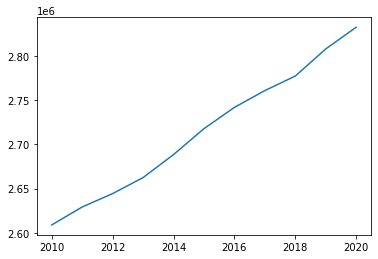

In [9]:
import matplotlib.pyplot as plt
plt.plot(df_pivot.year, df_pivot.total, label = "total")

plt.show()

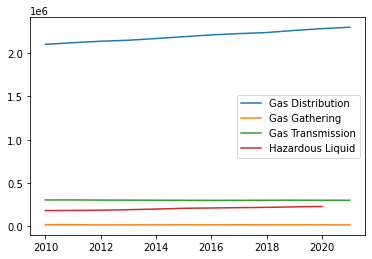

In [10]:
plt.plot(df_pivot.year, df_pivot['Gas Distribution'], label = "Gas Distribution")
plt.plot(df_pivot.year, df_pivot['Gas Gathering'], label = "Gas Gathering")
plt.plot(df_pivot.year, df_pivot['Gas Transmission'], label = "Gas Transmission")
plt.plot(df_pivot.year, df_pivot['Hazardous Liquid'], label = "Hazardous Liquid")

plt.legend()
plt.show()

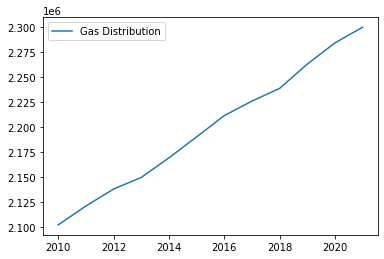

In [11]:
plt.plot(df_pivot.year, df_pivot['Gas Distribution'], label = "Gas Distribution")
# plt.plot(df_pivot.year, df_pivot['Gas Gathering'], label = "Gas Gathering")
# plt.plot(df_pivot.year, df_pivot['Gas Transmission'], label = "Gas Transmission")
# plt.plot(df_pivot.year, df_pivot['Hazardous Liquid'], label = "Hazardous Liquid")

plt.legend()
plt.show()

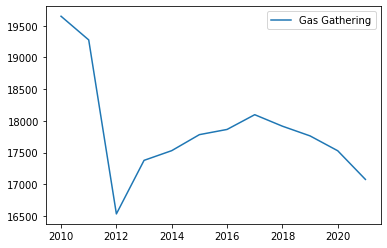

In [12]:
plt.plot(df_pivot.year, df_pivot['Gas Gathering'], label = "Gas Gathering")

plt.legend()
plt.show()

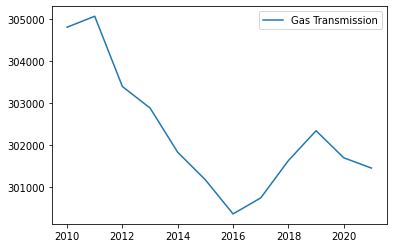

In [15]:
plt.plot(df_pivot.year, df_pivot['Gas Transmission'], label = "Gas Transmission")

plt.legend()
plt.show()

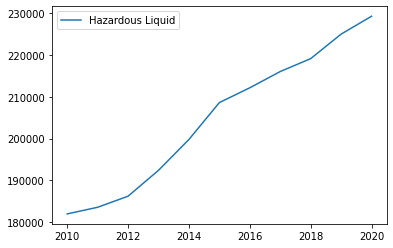

In [14]:
plt.plot(df_pivot.year, df_pivot['Hazardous Liquid'], label = "Hazardous Liquid")

plt.legend()
plt.show()